In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
W0 = np.load("W0.npy")
W1 = np.load("W1.npy")
W2 = np.load("W2.npy")
b0 = np.load("b0.npy")
b1 = np.load("b1.npy")
b2 = np.load("b2.npy")

In [26]:
W0 = np.load("W0.npy")
W1 = np.load("W1.npy")
W2 = np.load("W2.npy")
b0 = np.load("b0.npy")
b1 = np.load("b1.npy")
b2 = np.load("b2.npy")

df = pd.read_csv("train.csv")
df = np.array(df)
y = df[:, 0]
X = df[:, 1:]
X = X/255.

X_labeled = np.array(pd.read_csv("test.csv"))/255.


In [27]:
def ReLU(X):
    return np.maximum(0, X)

def Softmax(V): 
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

def ReLU_derivative(X):
    return X > 0

def onehot_encode(y):
    #convert vector y with size R(n_samples x 1) into matrix Y with size (10 x n_samples)
    Y = np.zeros((y.max()+1, y.size))
    Y[y, np.arange(y.size)] = 1
    return Y

def onehot_decode(Y):
    y = np.argmax(Y, axis=0)
    return y 

def get_accuracy(predictions, y):
    return np.sum(predictions == y) / len(y)

def CrossEntropy(y_hat, y):
    return np.sum(y*np.log(y_hat))


def batch_normalize(A):
    e = 0.001
    ss = A.shape[0]
    M = 1/ss * np.sum(A, axis = 0)
    V = 1/(ss-1) * np.sum(np.square(A-M),axis = 0)

    nA = (A-M)/np.sqrt(V+e)
    return nA

In [28]:
def forward_propagate(W0, b0, W1, b1, W2, b2, X):
    Z0 = np.dot(W0, X.T) + b0
    A0 = ReLU(Z0)

    Z1 = np.dot(W1, A0)  + b1 
    A1 = ReLU(Z1)

    Z2 = np.dot(W2, A1)  + b2 
    A2 = Softmax(Z2)
    return Z0, Z1, Z2, A0, A1, A2 

def forward_propagate1(W0, b0, W1, b1, W2, b2, X):

    Z0 = np.dot(W0, X.T) + b0
    A0 = ReLU(Z0)
    
    A0 = batch_normalize(A0)
    Z1 = np.dot(W1, A0)  + b1 
    A1 = ReLU(Z1)
    
    A1 = batch_normalize(A1)
    Z2 = np.dot(W2, A1)  + b2 
    A2 = Softmax(Z2)

    return Z0, Z1, Z2, A0, A1, A2 

In [29]:
Z0, Z1, Z2, A0, A1, A2 = forward_propagate1(W0, b0, W1, b1, W2, b2, X)
y_hat = onehot_decode(A2)
get_accuracy(y_hat, y) 

0.9624285714285714

Prediction: [0]


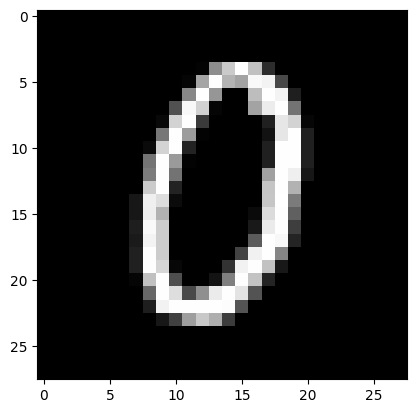

Prediction: [7]


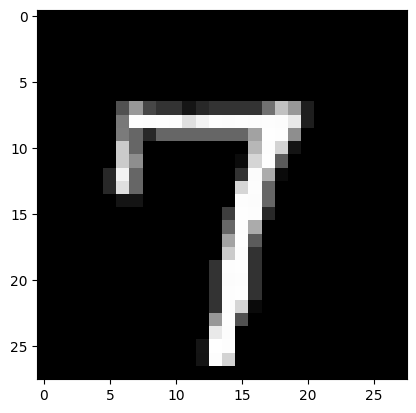

Prediction: [3]


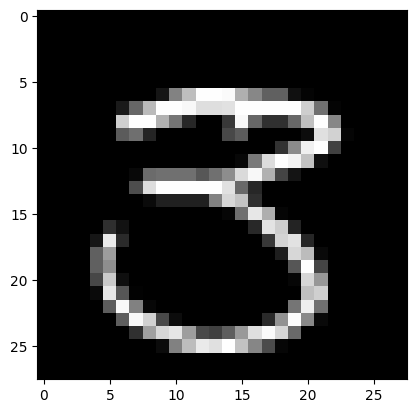

Prediction: [5]


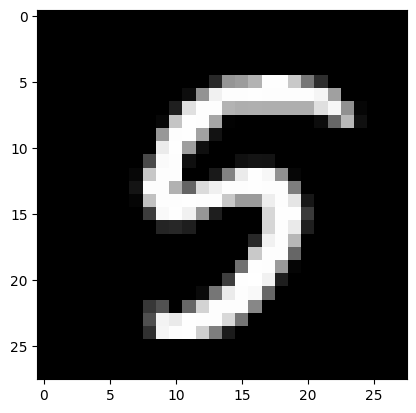

Prediction: [3]


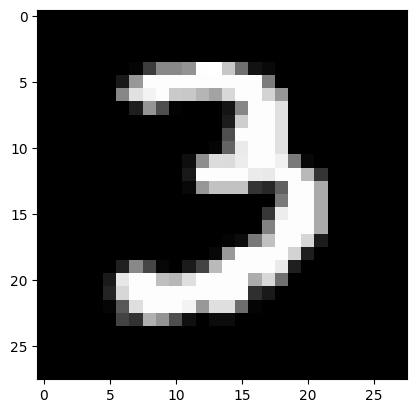

In [31]:
unseen = pd.read_csv("test.csv")
unseen = np.array(unseen)
def unseen_datas_prediction(sample_index, W0, b0, W1, b1, W2, b2, X):
    img = X[sample_index, :, None].reshape((28, 28))
    _, _, _, _, _, A2 = forward_propagate1(W0, b0, W1, b1, W2, b2, X[sample_index, :, None].T)
    prediction = onehot_decode(A2)
    print(f"Prediction: {prediction}")
    plt.gray()
    plt.imshow(img)
    plt.show()

def predict_unseen(index, W0, b0, W1, b1, W2, b2, X):
    for i in range(index, index+5):
        unseen_datas_prediction(i, W0, b0, W1, b1, W2, b2, X)

predict_unseen(5, W0, b0, W1, b1, W2, b2, X)